In [1]:
import sys
sys.path.append("..")

from pyro.distributions import Binomial
import torch
import seaborn as sns
import numpy as np

from utils import calc_hpdi

# Code 3.1

In [2]:
Pr_Positive_Vampire = 0.95 # true positive
Pr_Positive_Mortal = 0.01 # false positive
Pr_Vampire = 0.001
Pr_Positive = Pr_Positive_Vampire * Pr_Vampire + Pr_Positive_Mortal * (1-Pr_Vampire)
Pr_Vampire_Positive = Pr_Positive_Vampire * Pr_Vampire / Pr_Positive
Pr_Vampire_Positive

0.08683729433272395

# Code 3.2

[Text(0.5, 0, '$p$'),
 Text(0, 0.5, 'pmf'),
 Text(0.5, 1.0, 'posterior distribution')]

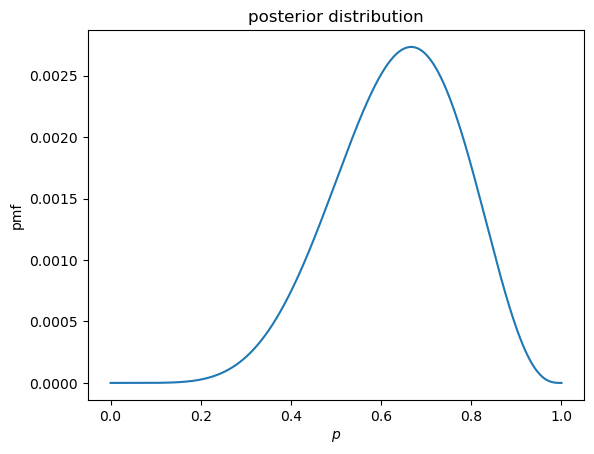

In [3]:
p_grid = torch.linspace(0, 1, 1000)
prob_p = torch.ones(1000)
prob_data = Binomial(9, probs=p_grid).log_prob(torch.tensor(6.)).exp()
posterior = prob_data * prob_p
posterior = posterior / posterior.sum()
ax = sns.lineplot(x=p_grid.numpy(), y=posterior.numpy())
ax.set(xlabel="$p$", ylabel='pmf', title='posterior distribution')

# Code 3.3

In [4]:
samples = np.random.choice(p_grid.numpy(), p=posterior.numpy(), size=10000)

# Code 3.4

<Axes: >

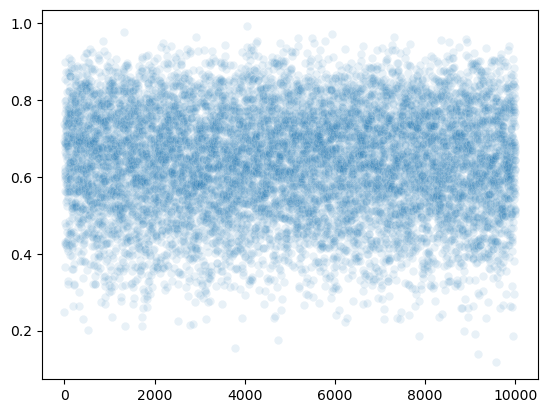

In [5]:
sns.scatterplot(x=range(len(samples)), y=samples, alpha=0.1)

# Code 3.5

<Axes: ylabel='Density'>

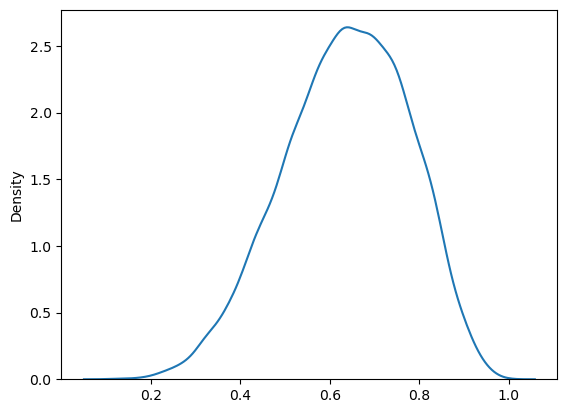

In [6]:
sns.kdeplot(x=samples)

# Code 3.6

[Text(0.5, 1.0, 'probability: 0.1719')]

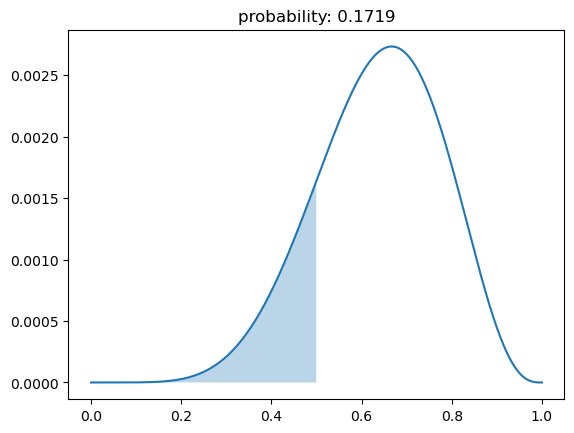

In [7]:
ax = sns.lineplot(x=p_grid.numpy(), y=posterior.numpy())
ax.fill_between(x=p_grid.numpy(), y1=posterior.numpy(), where=(p_grid.numpy()<=0.5).tolist(), alpha=0.3)
ax.set(title=f"probability: {posterior[p_grid < 0.5].sum():.4f}")

# Code 3.7

[Text(0.5, 1.0, 'probability: 0.1731'),
 Text(0.5, 0, '$p$'),
 Text(0, 0.5, 'pmf')]

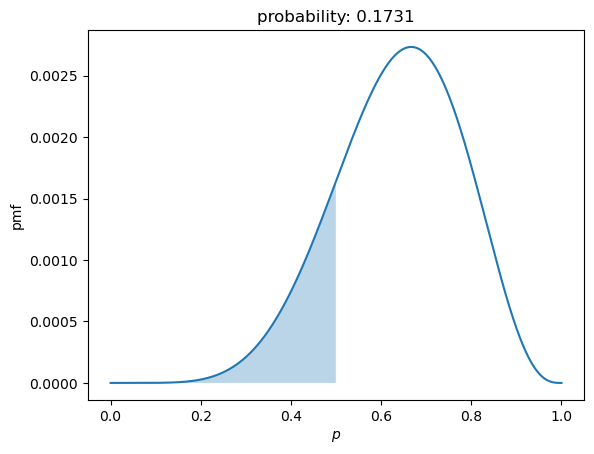

In [8]:
ax = sns.lineplot(x=p_grid.numpy(), y=posterior.numpy())
ax.fill_between(x=p_grid.numpy(), y1=posterior.numpy(), where=(p_grid.numpy()<=0.5).tolist(), alpha=0.3)
ax.set(title=f"probability: {samples[samples < 0.5].shape[0]/samples.shape[0]:.4f}", xlabel="$p$", ylabel='pmf')

# Code 3.8

[Text(0.5, 1.0, 'probability: 0.3801'),
 Text(0.5, 0, '$p$'),
 Text(0, 0.5, 'density')]

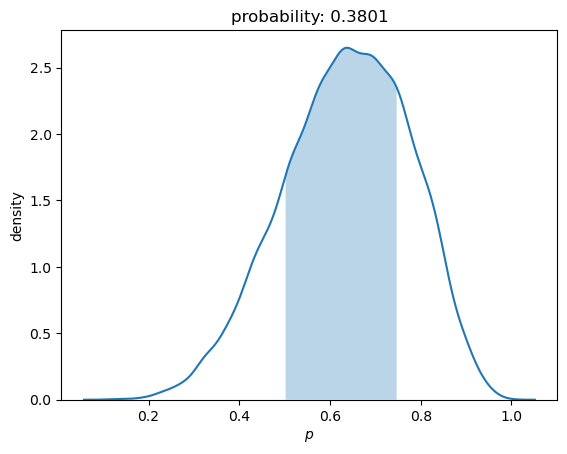

In [9]:
ax = sns.kdeplot(data=samples, bw_adjust=0.9)
x, y = ax.get_lines()[0].get_data()
mask = (x > 0.5) & (x < 0.75)
between_p = samples[(samples > 0.5) & (samples < 0.75)].sum() / samples.shape[0]
ax.fill_between(x[mask], y[mask], 0, alpha=0.3)
ax.set(title=f"probability: {between_p:.4f}", xlabel="$p$", ylabel='density')

# Code 3.9

[Text(0.5, 1.0, 'probability: 0.7998'),
 Text(0.5, 0, '$p$'),
 Text(0, 0.5, 'density')]

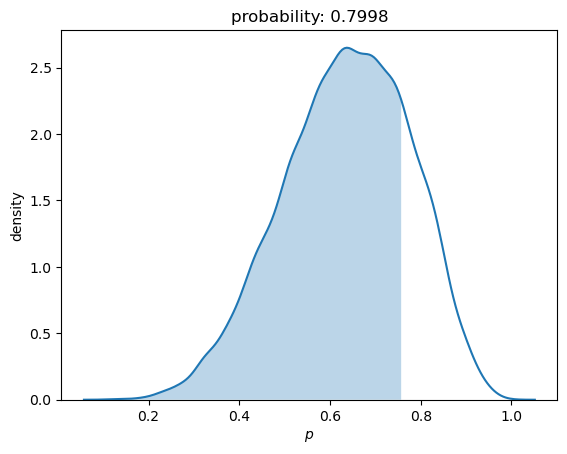

In [10]:
q = np.quantile(samples, 0.8)
ax = sns.kdeplot(data=samples, bw_adjust=0.9)
ax.fill_between(x, y, 0, where=(x < q), alpha=0.3)
ax.set(title=f"probability: {samples[samples < q].shape[0]/samples.shape[0]:.4f}", xlabel="$p$", ylabel='density')

# Code 3.10

[Text(0.5, 1.0, 'probability: 0.7985'),
 Text(0.5, 0, '$p$'),
 Text(0, 0.5, 'density')]

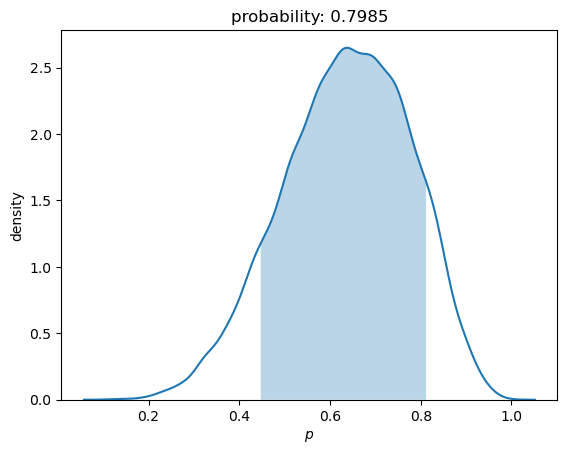

In [11]:
# Call this the "confidence/credible/compatibility interval"
q1, q2 = np.quantile(samples, [0.1, 0.9])
ax = sns.kdeplot(data=samples, bw_adjust=0.9)
mask = (x > q1) & (x < q2)
ax.fill_between(x[mask], y[mask], 0, alpha=0.3)
ax.set(title=f"probability: {samples[(samples > q1) & (samples < q2)].shape[0]/samples.shape[0]:.4f}", xlabel="$p$", ylabel='density')

# Code 3.11

[Text(0.5, 1.0, '50% Percentile'),
 Text(0.5, 0, 'proportion water ($p$)'),
 Text(0, 0.5, 'density')]

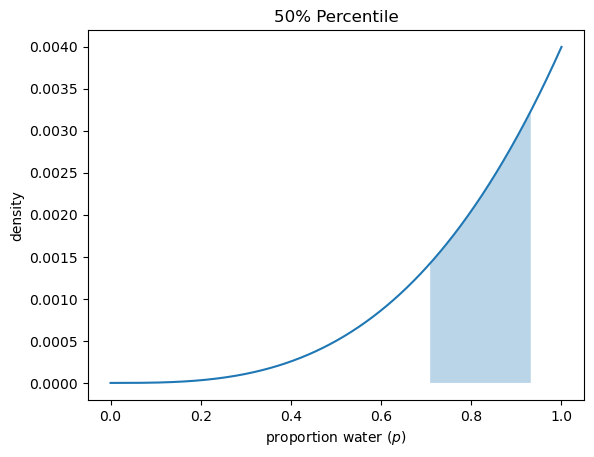

In [12]:
# Call this the "Percintile Interval"
p_grid = torch.linspace(0, 1, 1000)
prior = torch.ones(1000)
likelihood = Binomial(3, probs=p_grid).log_prob(torch.tensor(3.)).exp()
posterior = likelihood * prior
posterior = posterior / posterior.sum()
samples = np.random.choice(p_grid.numpy(), p=posterior.numpy(), size=int(1e4))
x = p_grid.numpy()
y = posterior.numpy()
ax = sns.lineplot(x=x, y=y)
ax.set(xbound=(0,1))
q1, q2 = np.quantile(samples, [0.25, 0.75])
mask = (x > q1) & (x < q2)
ax.fill_between(x[mask], y[mask], 0, alpha=0.3)
ax.set(title=f'50% Percentile', xlabel='proportion water ($p$)', ylabel='density')

# Code 3.12

[Text(0.5, 1.0, '50% HPDI'),
 Text(0.5, 0, 'proportion water ($p$)'),
 Text(0, 0.5, 'density')]

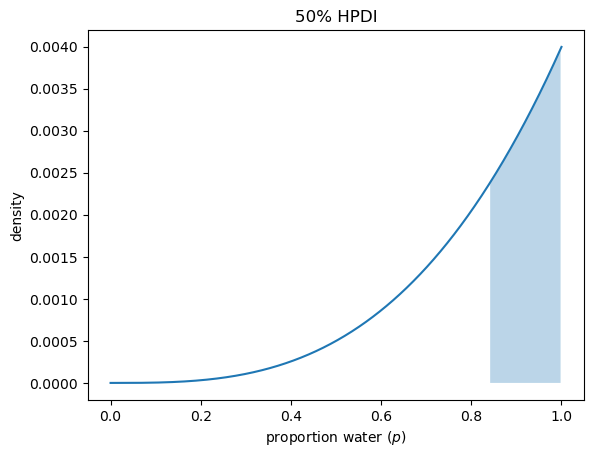

In [13]:

hpdi = calc_hpdi(samples, prob=0.5)
ax = sns.lineplot(x=x, y=y)
mask = (x > hpdi[0]) & (x < hpdi[-1])
ax.fill_between(x[mask], y[mask], 0, alpha=0.3)
ax.set(title=f"50% HPDI", xlabel='proportion water ($p$)', ylabel='density')

# Code 3.13

In [14]:
hdpi = calc_hpdi(samples, prob=0.5)
hpdi[0], hpdi[-1]

(np.float32(0.8408408), np.float32(0.998999))

# Code 3.14

In [15]:
p_grid[torch.argmax(posterior)].item()

1.0

# Code 3.15

np.float64(0.9779584442653457)

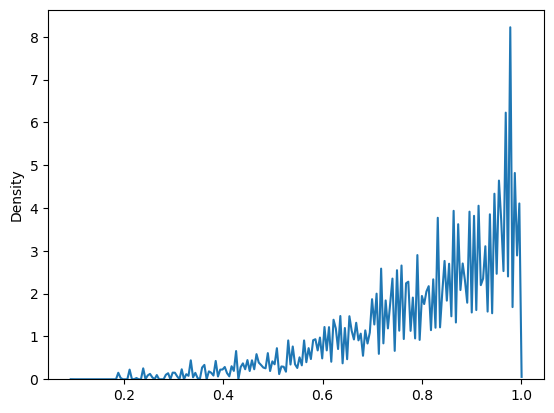

In [16]:
ax = sns.kdeplot(data=samples, bw_adjust=0.01)

line = ax.lines[0]
x, y = line.get_data()
x[np.argmax(y)]

# Code 3.16

In [17]:
samples.mean(), np.median(samples)

(np.float32(0.80006856), np.float32(0.8418418))

# Code 3.17

In [18]:
(posterior * torch.abs(0.5 - p_grid)).sum()

tensor(0.3129)

# Code 3.18

In [19]:
loss = [(posterior * torch.abs(i - p_grid)).sum().item() for i in p_grid]

# Code 3.19

In [20]:
p_grid[torch.argmin(torch.tensor(loss))]

tensor(0.8408)

# Code 3.20

In [21]:
Binomial(total_count=2, probs=0.7).log_prob(torch.arange(3)).exp()

tensor([0.0900, 0.4200, 0.4900])

# Code 3.21

In [22]:
Binomial(total_count=2, probs=0.7).sample((1,))

tensor([2.])

# Code 3.22

In [23]:
Binomial(total_count=2, probs=0.7).sample((10,))

tensor([2., 2., 1., 0., 1., 1., 2., 2., 2., 2.])

# Code 3.23

{0.0: 0.09149999916553497, 1.0: 0.4106999933719635, 2.0: 0.49779999256134033}


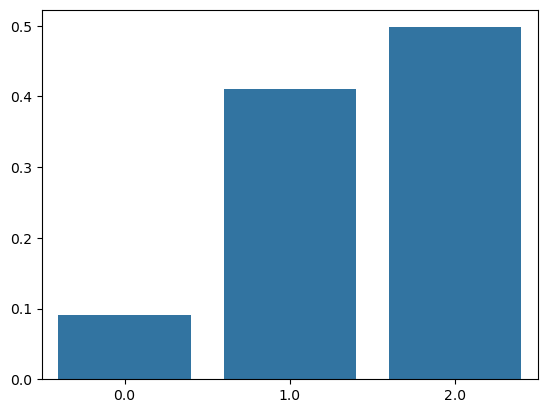

In [24]:
dummy_w = Binomial(total_count=2, probs=0.7).sample((10000,))
unique_w, counts = torch.unique(dummy_w, return_counts=True)
probs = counts.float() / counts.sum()
print(dict(zip(unique_w.tolist(), probs.tolist())))
ax = sns.barplot(x=unique_w.numpy(), y=probs.numpy())

# Code 3.24

{1.0: 0.0003000000142492354, 2.0: 0.003700000001117587, 3.0: 0.02290000021457672, 4.0: 0.07670000195503235, 5.0: 0.16670000553131104, 6.0: 0.2621999979019165, 7.0: 0.26980000734329224, 8.0: 0.15800000727176666, 9.0: 0.03970000147819519}


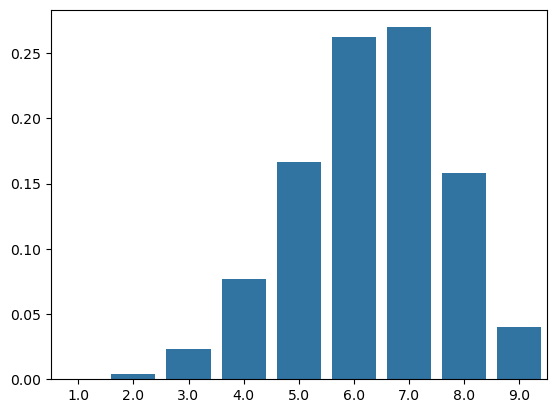

In [25]:
dummy_w = Binomial(total_count=9, probs=0.7).sample((10000,))
unique_w, counts = torch.unique(dummy_w, return_counts=True)
probs = counts.float() / counts.sum()
print(dict(zip(unique_w.tolist(), probs.tolist())))
ax = sns.barplot(x=unique_w.numpy(), y=probs.numpy())

# Code 3.25

In [26]:
w = Binomial(total_count=9, probs=0.6).sample((10000,))

# Code 3.26

In [27]:
w = Binomial(total_count=9, probs=torch.tensor(samples)).sample((10000,))

{0.0: 0.0015387299936264753, 1.0: 0.0060739400796592236, 2.0: 0.01459893025457859, 3.0: 0.028145290911197662, 4.0: 0.048416320234537125, 5.0: 0.07731439918279648, 6.0: 0.1165521889925003, 7.0: 0.16713808476924896, 8.0: 0.2306036353111267, 9.0: 0.3096184730529785}


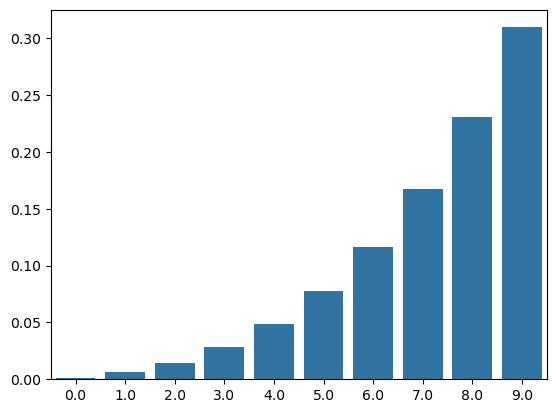

In [28]:
unique_w, counts = torch.unique(w, return_counts=True)
probs = counts.float() / counts.sum()
print(dict(zip(unique_w.tolist(), probs.tolist())))
ax = sns.barplot(x=unique_w.numpy(), y=probs.numpy())

# Practice

## Code 3.27

In [29]:
p_grid = torch.linspace(0, 1, 1000)
prior = torch.ones(1000)
likelihood = Binomial(total_count=9, probs=p_grid).log_prob(torch.tensor(6.)).exp()
posterior = likelihood * prior
posterior = posterior / posterior.sum()
np.random.seed(100)
samples = np.random.choice(p_grid.numpy(), p=posterior.numpy(), size=10000)

## 3E1

In [30]:
samples[samples < 0.2].shape[0] / samples.shape[0]

0.001

## 3E2

In [31]:
samples[samples > 0.8].shape[0] / samples.shape[0]

0.1209

## 3E3

In [32]:
samples[(samples > 0.2) & (samples < 0.8)].shape[0] / samples.shape[0]

0.8781

## 3E4

In [33]:
np.quantile(samples, 0.2)

np.float32(0.51551557)

## 3E5

In [34]:
np.quantile(samples, 0.8)

np.float32(0.7597598)

## 3E6

In [35]:
calc_hpdi(samples, prob=0.66)

array([0.51651657, 0.51651657, 0.51651657, ..., 0.7887888 , 0.7887888 ,
       0.7887888 ], shape=(6600,), dtype=float32)

## 3E7

In [36]:
np.quantile(samples, [0.5-0.66/2, 0.5+0.66/2])

array([0.4984985 , 0.77294296])

## 3M1

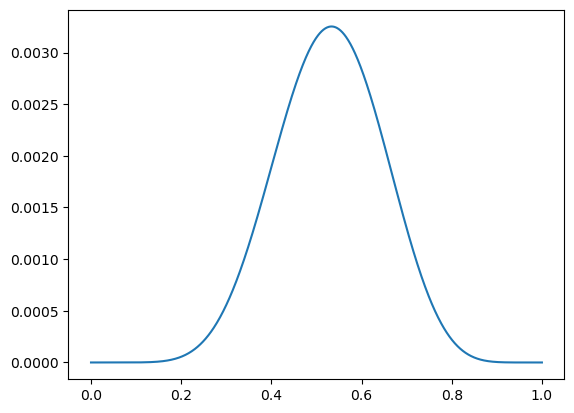

In [37]:
points = 1000
p_grid = torch.linspace(0, 1, points)
prior = torch.ones(points)
likelihood = Binomial(total_count=15, probs=p_grid).log_prob(torch.tensor(8.)).exp()
posterior = likelihood * prior
posterior = posterior / posterior.sum()
ax = sns.lineplot(x=p_grid.numpy(), y=posterior.numpy())

## 3M2

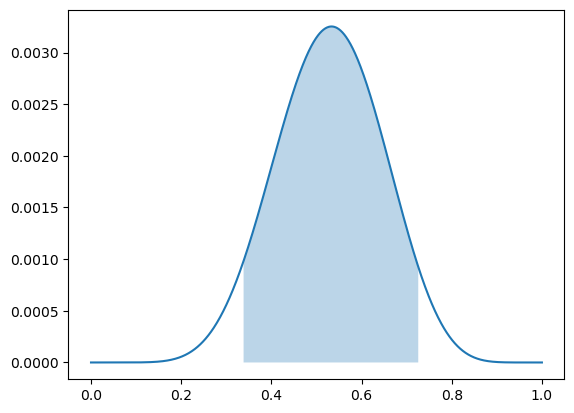

In [38]:
np.random.seed(100)
samples = np.random.choice(p_grid.numpy(), p=posterior.numpy(), size=10000)
p1, p2 = calc_hpdi(samples, prob=0.90)[0], calc_hpdi(samples, prob=0.90)[-1]
ax = sns.lineplot(x=p_grid.numpy(), y=posterior.numpy())
mask = (p_grid.numpy() >= p1) & (p_grid.numpy() <= p2)
ax.fill_between(x=p_grid.numpy()[mask], y1=posterior.numpy()[mask], alpha=0.3)

## 3M3

{0.0: 0.0005957999965175986, 1.0: 0.0035431000869721174, 2.0: 0.01170200016349554, 3.0: 0.0279207993298769, 4.0: 0.05293269827961922, 5.0: 0.08381669968366623, 6.0: 0.11475349962711334, 7.0: 0.13798679411411285, 8.0: 0.1468241959810257, 9.0: 0.1381395012140274, 10.0: 0.11469340324401855, 11.0: 0.08256889879703522, 12.0: 0.049948498606681824, 13.0: 0.024360699579119682, 14.0: 0.008545399643480778, 15.0: 0.0016680000117048621}


[Text(0.5, 1.0, '8 water: 0.1468')]

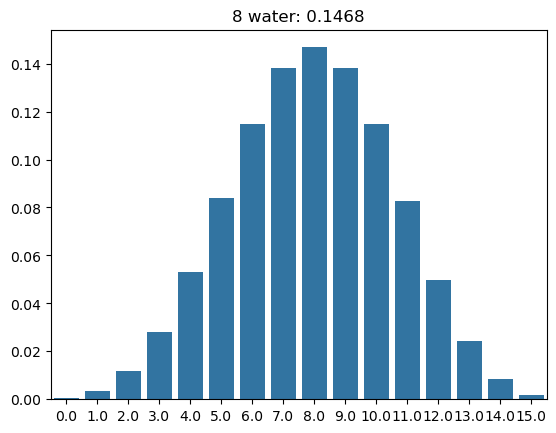

In [39]:
w = Binomial(total_count=15, probs=torch.tensor(samples)).sample((1000,))
unique_w, counts = torch.unique(w, return_counts=True)
probs = counts.float() / counts.sum()
print(dict(zip(unique_w.tolist(), probs.tolist())))
ax = sns.barplot(x=unique_w.numpy(), y=probs.numpy())
ax.set(title=f'8 water: {dict(zip(unique_w.tolist(), probs.tolist()))[8]:.4f}')

## 3M4

{0.0: 0.0056559001095592976, 1.0: 0.02863140031695366, 2.0: 0.07622519880533218, 3.0: 0.13920779526233673, 4.0: 0.1921575963497162, 5.0: 0.20757900178432465, 6.0: 0.1755892038345337, 7.0: 0.11284189671278, 8.0: 0.05020720139145851, 9.0: 0.011904800310730934}


[Text(0.5, 1.0, '6 water: 0.1756')]

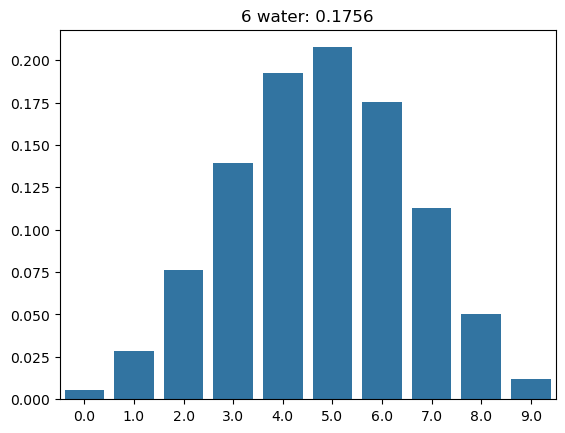

In [40]:
w = Binomial(total_count=9, probs=torch.tensor(samples)).sample((1000,))
unique_w, counts = torch.unique(w, return_counts=True)
probs = counts.float() / counts.sum()
print(dict(zip(unique_w.tolist(), probs.tolist())))
ax = sns.barplot(x=unique_w.numpy(), y=probs.numpy())
ax.set(title=f'6 water: {dict(zip(unique_w.tolist(), probs.tolist()))[6]:.4f}')

## 3M5

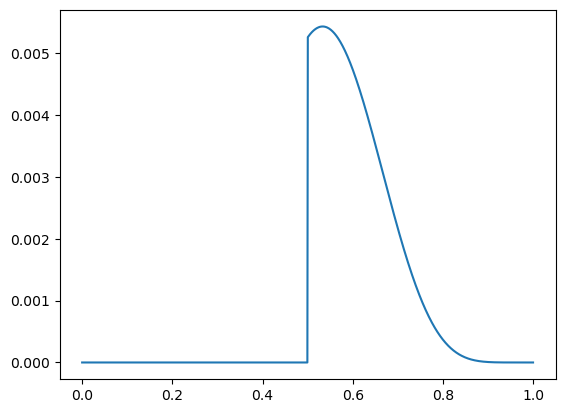

In [41]:
# 3M1
points = 1000
p_grid = torch.linspace(0, 1, points)
prior = torch.where(p_grid < 0.5, torch.zeros(1), torch.ones(1))
likelihood = Binomial(total_count=15, probs=p_grid).log_prob(torch.tensor(8.)).exp()
posterior = likelihood * prior
posterior = posterior / posterior.sum()
ax = sns.lineplot(x=p_grid.numpy(), y=posterior.numpy())

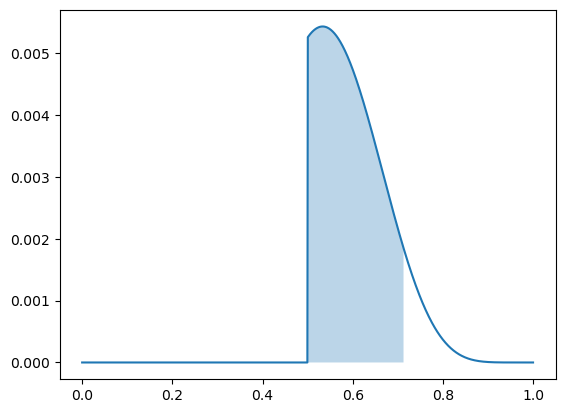

In [42]:
# 3M2
np.random.seed(100)
samples = np.random.choice(p_grid.numpy(), p=posterior.numpy(), size=10000)
p1, p2 = calc_hpdi(samples, prob=0.90)[0], calc_hpdi(samples, prob=0.90)[-1]
ax = sns.lineplot(x=p_grid.numpy(), y=posterior.numpy())
mask = (p_grid.numpy() >= p1) & (p_grid.numpy() <= p2)
ax.fill_between(x=p_grid.numpy()[mask], y1=posterior.numpy()[mask], alpha=0.3)

{0.0: 7.000000096013537e-06, 1.0: 9.200000204145908e-05, 2.0: 0.0006903000175952911, 3.0: 0.003487400012090802, 4.0: 0.012418000027537346, 5.0: 0.033040501177310944, 6.0: 0.0691424012184143, 7.0: 0.11560489982366562, 8.0: 0.15753990411758423, 9.0: 0.17721129953861237, 10.0: 0.1651993989944458, 11.0: 0.1277810037136078, 12.0: 0.08076120167970657, 13.0: 0.040140099823474884, 14.0: 0.01415290031582117, 15.0: 0.002731699962168932}


[Text(0.5, 1.0, '8 water: 0.1575')]

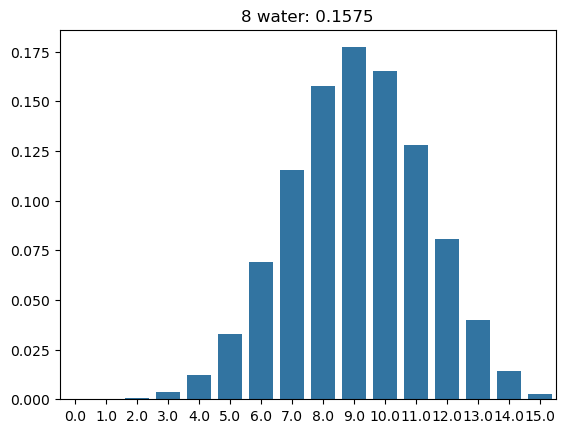

In [43]:
# 3M3
w = Binomial(total_count=15, probs=torch.tensor(samples)).sample((1000,))
unique_w, counts = torch.unique(w, return_counts=True)
probs = counts.float() / counts.sum()
print(dict(zip(unique_w.tolist(), probs.tolist())))
ax = sns.barplot(x=unique_w.numpy(), y=probs.numpy())
ax.set(title=f'8 water: {dict(zip(unique_w.tolist(), probs.tolist()))[8]:.4f}')

{0.0: 0.000514000013936311, 1.0: 0.00549959996715188, 2.0: 0.026943199336528778, 3.0: 0.08027879893779755, 4.0: 0.1609696000814438, 5.0: 0.22768990695476532, 6.0: 0.23194220662117004, 7.0: 0.16719189286231995, 8.0: 0.07953990250825882, 9.0: 0.019430899992585182}


[Text(0.5, 1.0, '6 water: 0.2319')]

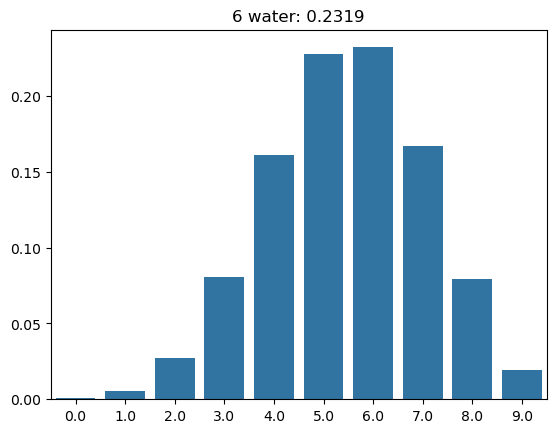

In [44]:
# 3M4
w = Binomial(total_count=9, probs=torch.tensor(samples)).sample((1000,))
unique_w, counts = torch.unique(w, return_counts=True)
probs = counts.float() / counts.sum()
print(dict(zip(unique_w.tolist(), probs.tolist())))
ax = sns.barplot(x=unique_w.numpy(), y=probs.numpy())
ax.set(title=f'6 water: {dict(zip(unique_w.tolist(), probs.tolist()))[6]:.4f}')

## 3M6

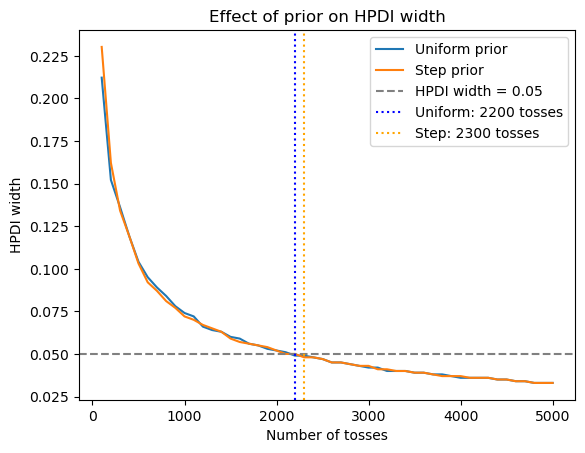

In [45]:
from enum import Enum

class PriorType(Enum):
    UNIFORM = "uniform"
    STEP = "step"

def globe_sim(tosses, prior_type=PriorType.UNIFORM):
    obs = Binomial(total_count=tosses, probs=0.7).sample((1,))
    p_grid = torch.linspace(0, 1, points)

    if prior_type == PriorType.UNIFORM:
        prior = torch.ones(points)
    elif prior_type == PriorType.STEP:
        prior = torch.where(p_grid < 0.5, torch.zeros(1), torch.ones(1))
    else:
        raise ValueError("prior_type must be PriorType.UNIFORM or PriorType.STEP")
    
    likelihood = Binomial(total_count=tosses, probs=p_grid).log_prob(obs).exp()
    posterior = likelihood * prior
    posterior = posterior / posterior.sum()

    np.random.seed(100)
    samples = np.random.choice(p_grid.numpy(), p=posterior.numpy(), size=10000)
    interval_width = calc_hpdi(samples, prob=0.99)[-1] - calc_hpdi(samples, prob=0.99)[0]
    return interval_width

globe_sim(tosses=2300, prior_type=PriorType.UNIFORM)
tosses_space = torch.arange(100, 5001, 100)
uniform_hpdi_widths = []
step_hpdi_widths = []
for tosses in tosses_space:
    uniform_hpdi_widths.append(globe_sim(int(tosses), prior_type=PriorType.UNIFORM))
    step_hpdi_widths.append(globe_sim(int(tosses), prior_type=PriorType.STEP))
ax = sns.lineplot(x=tosses_space.numpy(), y=uniform_hpdi_widths, label="Uniform prior")
ax = sns.lineplot(x=tosses_space.numpy(), y=step_hpdi_widths, label="Step prior")
ax.set(xlabel="Number of tosses", ylabel="HPDI width", title="Effect of prior on HPDI width")
ax.legend(title="Prior Type")

# Draw horizontal line at HPDI width = 0.05
ax.axhline(0.05, color='gray', linestyle='--', label='HPDI width = 0.05')

# Find tosses number where HPDI width first drops below or equals 0.05 for each prior
uniform_idx = next(i for i, v in enumerate(uniform_hpdi_widths) if v <= 0.05)
step_idx = next(i for i, v in enumerate(step_hpdi_widths) if v <= 0.05)

ax.axvline(tosses_space[uniform_idx].item(), color='blue', linestyle=':', label=f'Uniform: {tosses_space[uniform_idx].item()} tosses')
ax.axvline(tosses_space[step_idx].item(), color='orange', linestyle=':', label=f'Step: {tosses_space[step_idx].item()} tosses')

ax.legend()


## Code 2.28 - 30

In [46]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1])

birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

birth1.sum() + birth2.sum()

np.int64(111)

## 3H1

0.5545545816421509


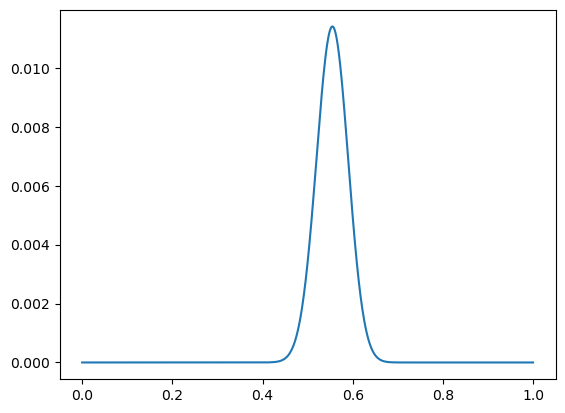

In [47]:
all_births = np.concatenate((birth1, birth2))

points = 1000
p_grid = torch.linspace(0, 1, points)
prior = torch.ones(points)
likelihood = Binomial(total_count=len(all_births), probs=p_grid).log_prob(torch.tensor(all_births.sum())).exp()
posterior = likelihood * prior
posterior = posterior / posterior.sum()

ax = sns.lineplot(x=p_grid.numpy(), y=posterior.numpy())
# parameter value that maximises the posterior
print(p_grid[torch.argmax(posterior)].item())

## 3H2

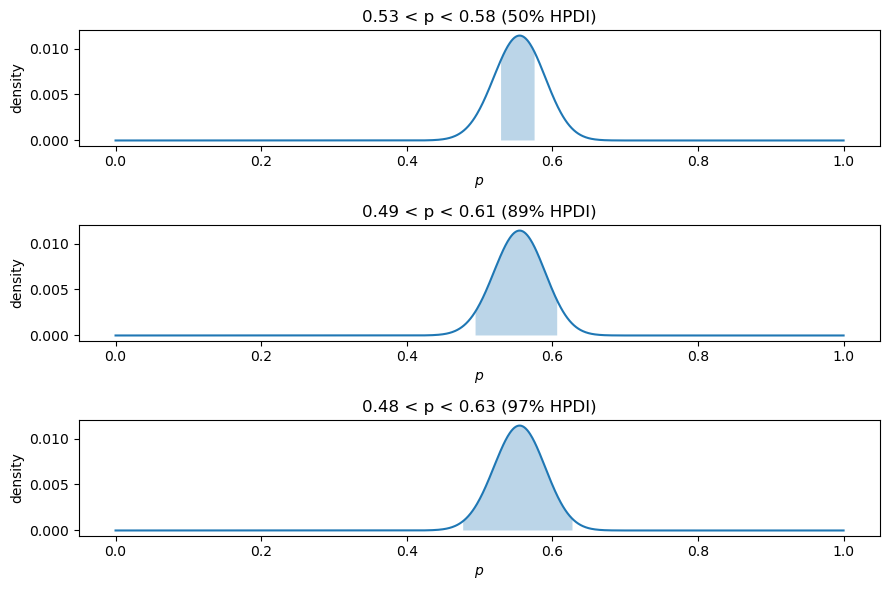

In [48]:
import matplotlib.pyplot as plt

np.random.seed(100)
samples = np.random.choice(p_grid.numpy(), p=posterior.numpy(), size=10000)

fig, axes = plt.subplots(3, 1, figsize=(9, 6))

# 50% HPDI
p1, p2 = calc_hpdi(samples, prob=0.50)[0], calc_hpdi(samples, prob=0.50)[-1]
ax = sns.lineplot(x=p_grid.numpy(), y=posterior.numpy(), ax=axes[0])
mask = (p_grid.numpy() >= p1) & (p_grid.numpy() <= p2)
ax.fill_between(x=p_grid.numpy()[mask], y1=posterior.numpy()[mask], alpha=0.3)
ax.set(title=f"{p1:.2f} < p < {p2:.2f} (50% HPDI)", xlabel="$p$", ylabel='density')

# 89% HPDI
p1, p2 = calc_hpdi(samples, prob=0.89)[0], calc_hpdi(samples, prob=0.89)[-1]
ax = sns.lineplot(x=p_grid.numpy(), y=posterior.numpy(), ax=axes[1])
mask = (p_grid.numpy() >= p1) & (p_grid.numpy() <= p2)
ax.fill_between(x=p_grid.numpy()[mask], y1=posterior.numpy()[mask], alpha=0.3)
ax.set(title=f"{p1:.2f} < p < {p2:.2f} (89% HPDI)", xlabel="$p$", ylabel='density')

# 97% HPDI
p1, p2 = calc_hpdi(samples, prob=0.97)[0], calc_hpdi(samples, prob=0.97)[-1]
ax = sns.lineplot(x=p_grid.numpy(), y=posterior.numpy(), ax=axes[2])
mask = (p_grid.numpy() >= p1) & (p_grid.numpy() <= p2)
ax.fill_between(x=p_grid.numpy()[mask], y1=posterior.numpy()[mask], alpha=0.3)
ax.set(title=f"{p1:.2f} < p < {p2:.2f} (97% HPDI)", xlabel="$p$", ylabel='density')

plt.tight_layout()

## 3H3

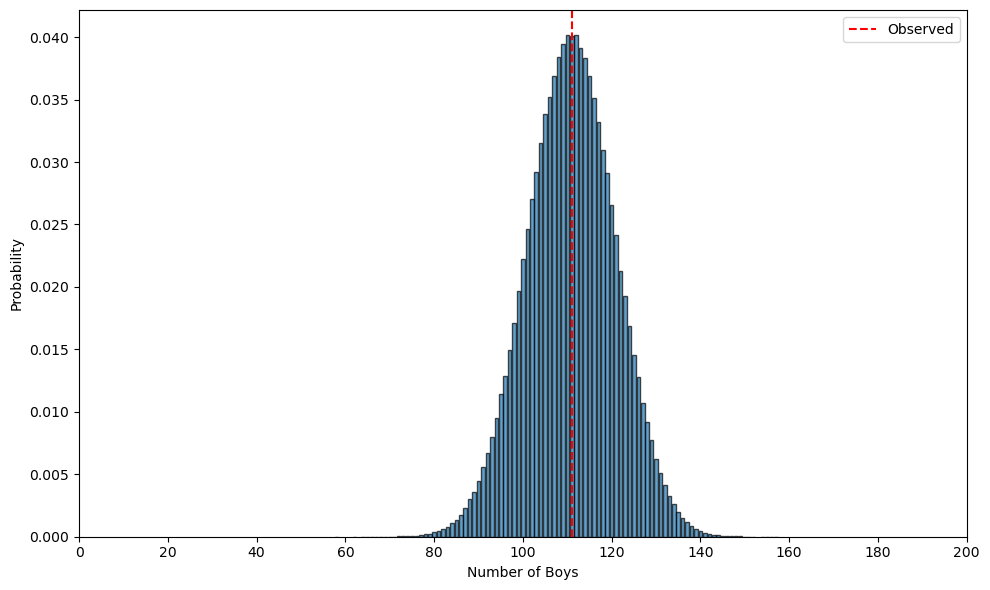

In [49]:
boys = Binomial(total_count=200, probs=torch.tensor(samples)).sample((100,))
unique_boys, counts = torch.unique(boys, return_counts=True)
probs = counts.float() / counts.sum()

# Use matplotlib bar instead of seaborn barplot
plt.figure(figsize=(10, 6))
plt.bar(unique_boys.numpy(), probs.numpy(), width=0.8, alpha=0.7, edgecolor='black')
plt.axvline(111, color='red', linestyle='--', label='Observed')
plt.xlabel('Number of Boys')
plt.ylabel('Probability')
plt.xticks(np.arange(0, 201, 20))
plt.legend()
plt.tight_layout()
plt.show()

## 3H4

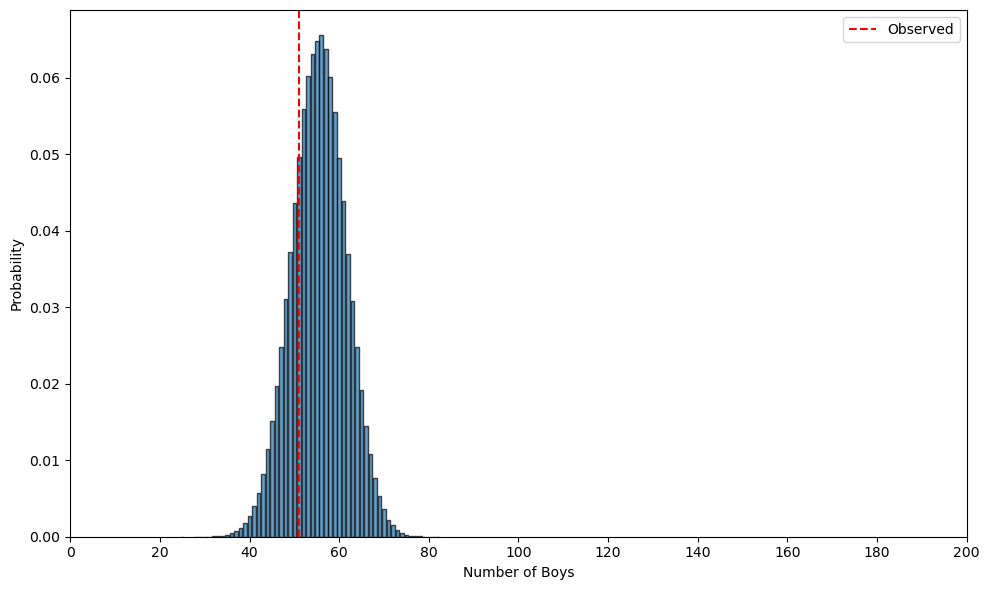

In [50]:
boys = Binomial(total_count=100, probs=torch.tensor(samples)).sample((100,))
unique_boys, counts = torch.unique(boys, return_counts=True)
probs = counts.float() / counts.sum()

# Use matplotlib bar instead of seaborn barplot
plt.figure(figsize=(10, 6))
plt.bar(unique_boys.numpy(), probs.numpy(), width=0.8, alpha=0.7, edgecolor='black')
plt.axvline(birth1.sum(), color='red', linestyle='--', label='Observed')
plt.xlabel('Number of Boys')
plt.ylabel('Probability')
plt.xticks(np.arange(0, 201, 20))
plt.legend()
plt.tight_layout()
plt.show()

## 3H5

In [51]:
first_girls = birth1 == 0
second_after_first_girl = birth2[birth1 == 0]
second_after_first_girl

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1])

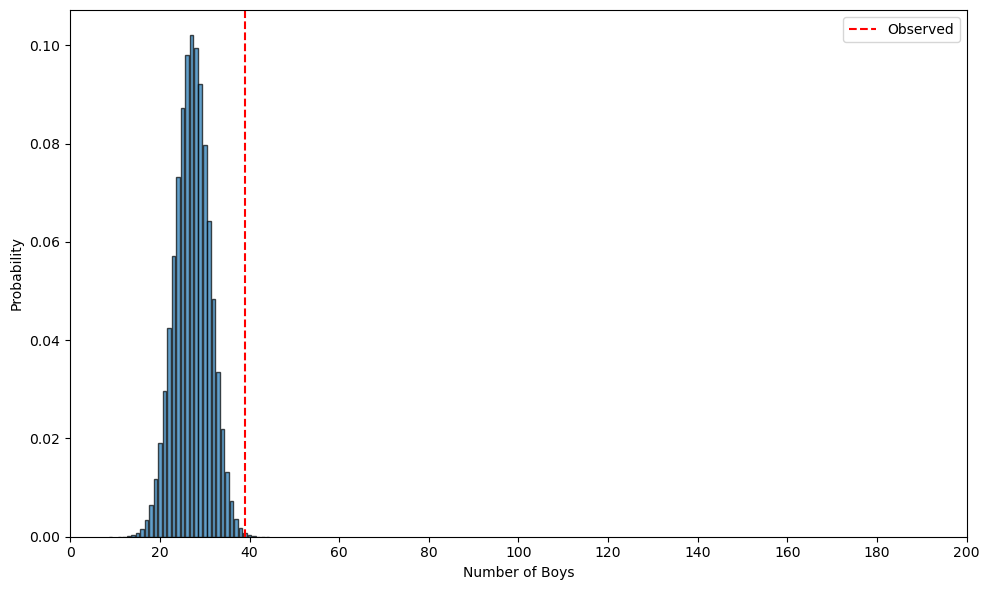

In [52]:
boys = Binomial(total_count=49, probs=torch.tensor(samples)).sample((100,))
unique_boys, counts = torch.unique(boys, return_counts=True)
probs = counts.float() / counts.sum()

# Use matplotlib bar instead of seaborn barplot
plt.figure(figsize=(10, 6))
plt.bar(unique_boys.numpy(), probs.numpy(), width=0.8, alpha=0.7, edgecolor='black')
plt.axvline(second_after_first_girl.sum(), color='red', linestyle='--', label='Observed')
plt.xlabel('Number of Boys')
plt.ylabel('Probability')
plt.xticks(np.arange(0, 201, 20))
plt.legend()
plt.tight_layout()
plt.show()